# Importing Libraries

In [1]:
import requests
import os

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

# Implementing PCA and Dual PCA algorithms

In [3]:
# PCA (with covariance implementation)
def my_pca(X,rowval):
    cov_mat = np.cov(X,rowvar=rowval) #Calculating Covariance Matrix
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat) #Calculating the Eigen Values and Eigen Vectors using Covariance Matrix
    return eigen_values,eigen_vectors

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X - np.mean(X , axis = 0)
X=X.T

val, vec = my_pca(X,True) #Passing True since transpose is already done
print("Eigen Values:",val)
print("\nEigen Vectors:",vec)

Eigen Values: [7.93954312 0.06045688]

Eigen Vectors: [[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)
def my_dual_pca(X,rowval):
    cov_X = np.cov(X,rowvar=rowval) #Calculating Covariance Matrix
    U, s, VT = np.linalg.svd(cov_X) #Calculating the Eigen Values and Eigen Vectors using Covariance Matrix
    return U,s

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X - np.mean(X , axis = 0)
X = X.T
eig_vec,eig_val = my_dual_pca(X,True) #Passing True since transpose is already done
print("Eigen Values:",eig_val)
print("\nEigen Vectors:",eig_vec)

Eigen Values: [7.93954312 0.06045688]

Eigen Vectors: [[-0.83849224 -0.54491354]
 [-0.54491354  0.83849224]]


## Visualisation

In [5]:
import pandas as pd
X = np.load('./Data/synthetic_data.npy', allow_pickle=True)
X = X - np.mean(X) #Standardizing/Normalizing the dataset to improve effectivity of PCA

#Applying PCA function
eigen_values,eigen_vectors = my_pca(X,True) #Calculating Eigenvalues and Eigenvectors

#Sorting the Eigen vectors based on Eigen values and picking the top 3 Eigenvectors to be the Principal Vectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:3]

#Transforming data
X_reduced = np.dot(eigenvector_subset.transpose(), X).transpose()

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2','PC3'])

**Plotting for PC1 and PC2**

Text(0.5, 1.0, 'Plotting data using PC1 and PC2')

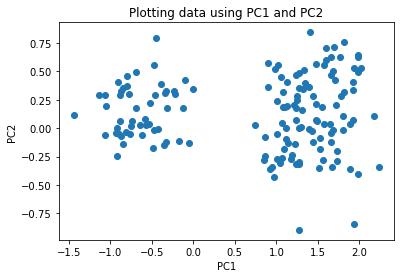

In [6]:
plt.scatter(principal_df['PC1'], principal_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Plotting data using PC1 and PC2")

**Plotting for PC1 and PC3**

Text(0.5, 1.0, 'Plotting data using PC1 and PC3')

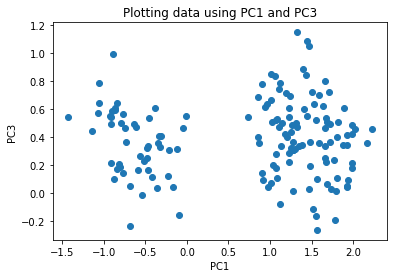

In [7]:
plt.scatter(principal_df['PC1'], principal_df["PC3"])
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.title("Plotting data using PC1 and PC3")

**Plotting for PC2 and PC3**

Text(0.5, 1.0, 'Plotting data using PC2 and PC3')

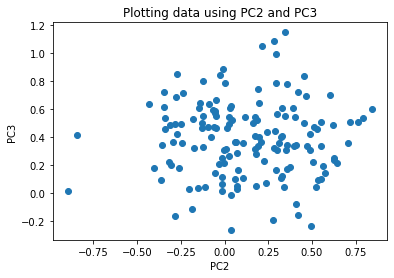

In [8]:
plt.scatter(principal_df['PC2'], principal_df["PC3"])
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("Plotting data using PC2 and PC3")

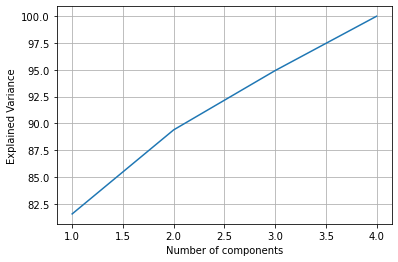

In [9]:
def plotting_ncomponents_vs_variance():
    tot = sum(eigen_values)
    var_exp = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    n_comp = [1,2,3,4]
    plt.plot(n_comp,cum_var_exp)
    plt.grid()
    plt.xlabel("Number of components")
    plt.ylabel("Explained Variance")
plotting_ncomponents_vs_variance()    

**Observations**
<br><br>1. With 3 Principal Components, we can see the explained variance is around 95% which satisfactory. This means the dimension reduction did not cause data loss
<br>2.We can observe clusters in the data:
* When reduced to lower dimensions, we can see clusters meaning there are classes in the data
* Plot with Principal Component 1 and Principal Component 2 show atleast 2 seperate clusters
* Same with Principal Component 1 and Principal Component 3

## Image compression

To calculate the appropriate number of Principal Components, we can create a plot of Total Variance vs the number of components.
<br>This can be very telling of the number of Principal Components we need as the aim of PCA is to maximize the Variance whilst cutting down on the dimensions to avoid the "Curse of Dimensionality" to prevent overfitting of the ML models.

In [2]:
#Loading dataset
X, _ = np.load(f'./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices].T
test_X = X[:, test_indices].T

train_X = train_X - np.mean(train_X , axis = 0)
test_X = test_X - np.mean(test_X , axis = 0)

In [11]:
train_X.shape

(150, 4096)

In [12]:
# Applying PCA to find the optimal number of principal components
vectors,values = my_dual_pca(train_X,False)
sorted_index = values.argsort()[::-1] 
values = values[sorted_index]
vectors = vectors[:,sorted_index]
X_train_tran = np.dot(vectors.transpose(), train_X.transpose()).transpose()

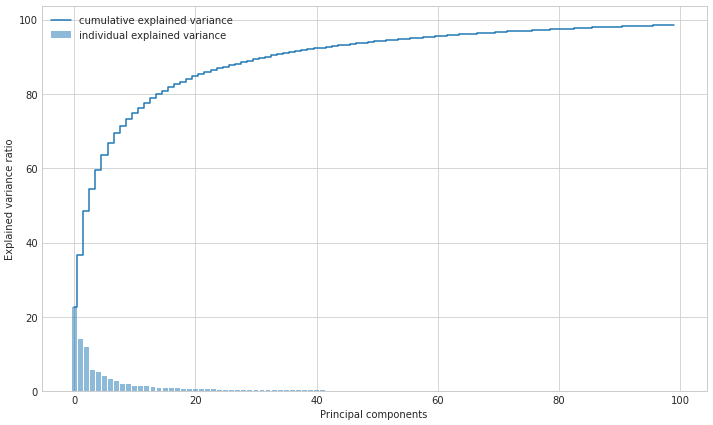

In [13]:
def plotting_ncomponents_vs_variance():
    tot = sum(values)
    var_exp = [(i / tot)*100 for i in sorted(values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)

    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 6))

        plt.bar(range(100), var_exp[:100], alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(100), cum_var_exp[:100], where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
plotting_ncomponents_vs_variance()

From the above Number of components vs Explained variance plot, we can infer that 70 is the best pick for number of principal components.<br>
With 70 as Principal Components, the explained Variance is not too high to prevent overfitting and sufficiently high so as to not underfit.<br>
The Bias-Variance tradeoff is balanced with 70 as Principal Components.

In [14]:
# Applying PCA with 70 as the number of Principal Components
vectors,values = my_dual_pca(train_X,False)
sorted_index = values.argsort()[::-1] 
values = values[sorted_index]
vectors = vectors[:,sorted_index]
vectors = vectors[:,:70]
X_train_tran = np.dot(vectors.transpose(), train_X.transpose()).transpose()

In [15]:
#Modified the print_image function to plot in grid

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(n_row * n_col,images.shape[0])):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(np.flip(images[i].reshape((h, w)).T,1), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**Plotting Eigen Faces**

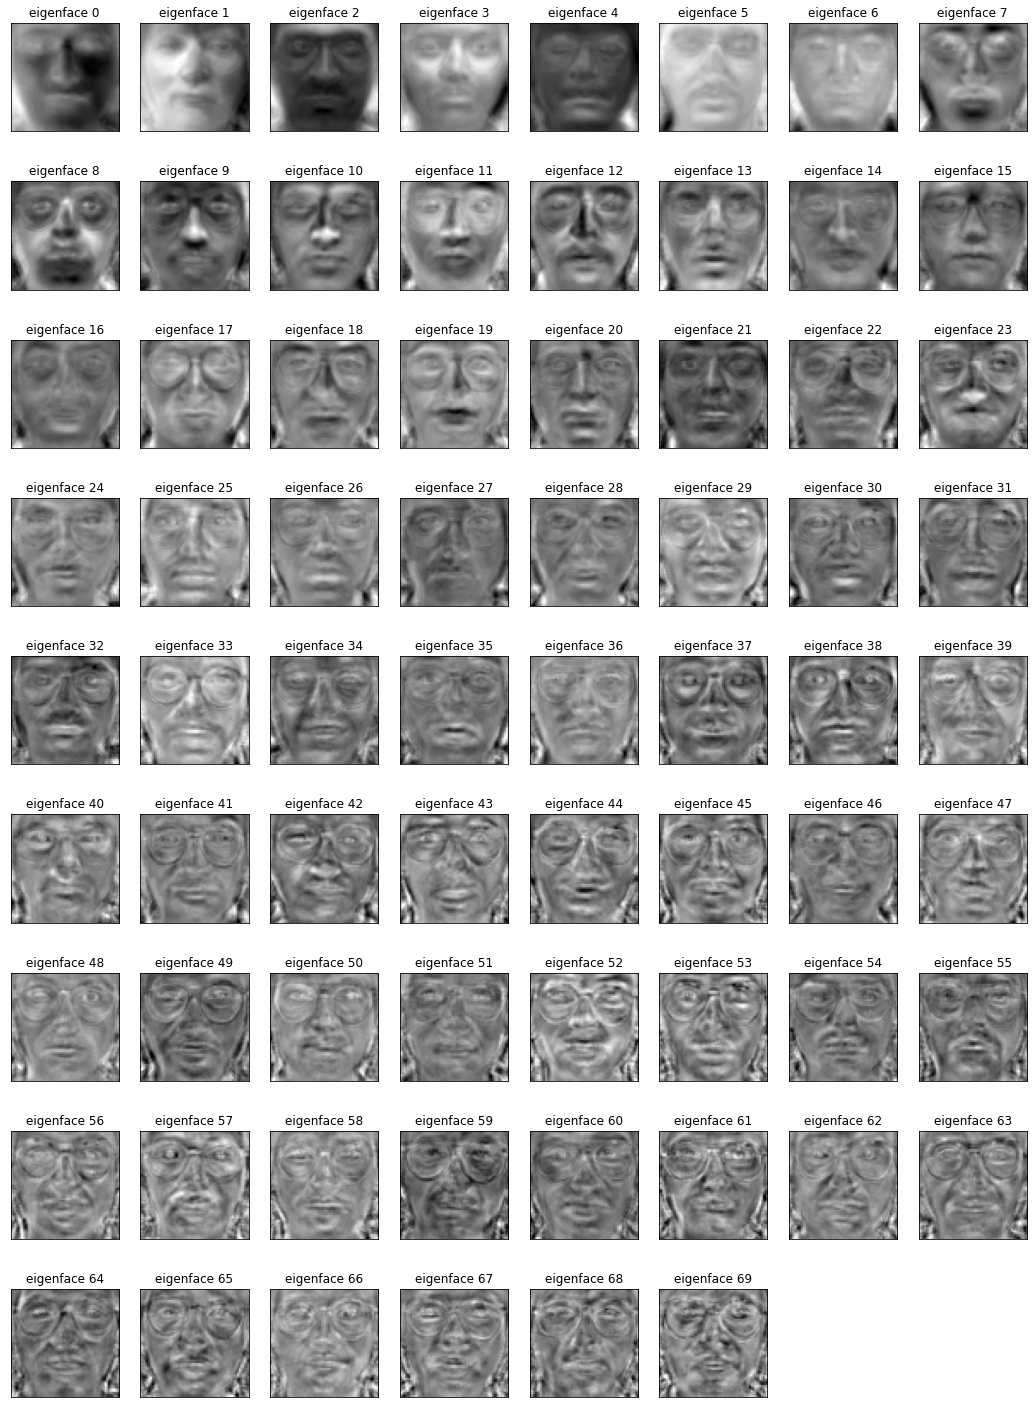

In [16]:
eigenface_titles = ["eigenface %d" % i for i in range(vectors.shape[1])]
plot_gallery(vectors.T, eigenface_titles, 64, 64,15,8)
plt.show()

In [17]:
#Transforming the testing dataset using the Eigen Faces obtained above
X_test_tran = np.dot(vectors.transpose(), test_X.transpose()).transpose()

In [18]:
print("Shape of the transformed low dimesion test dataset:",X_test_tran.shape)
print("\nLow dimesion test dataset",X_test_tran)

Shape of the transformed low dimesion test dataset: (15, 70)

Low dimesion test dataset [[-1.65984661e+03 -3.49512447e+02 -3.58427662e+02 ... -9.26091860e+01
   3.69618299e+01  3.55328107e+01]
 [-9.38475143e+02  5.16685566e+02  1.83341566e+03 ... -1.82805697e+02
  -3.77006315e+01  9.44225012e+01]
 [-9.11646369e+00 -1.47878961e+03 -2.48977984e+02 ...  9.29388565e+01
  -7.00394013e+00  7.92281615e-01]
 ...
 [ 2.73741386e+03 -1.41469769e+02  6.26130503e+02 ... -8.06648766e+01
  -9.85793824e+01  4.22894483e+01]
 [ 3.50328271e+02  4.69818859e+02  3.63404451e+02 ... -8.15982651e+01
   1.75440603e+01 -1.16552078e+01]
 [ 1.80587489e+03 -1.75819732e+02 -4.00445879e+02 ...  1.60979483e+02
  -1.60329565e+01  3.33382768e+01]]


In [19]:
#Reconstructing the compressed image
data_re = []
for i in range(len(X_test_tran)):
    temp= np.matmul(vectors,X_test_tran[i])
    temp=temp.real
    temp_ = temp.reshape(4096)
    data_re.append(temp_)
X_re = np.array(data_re)

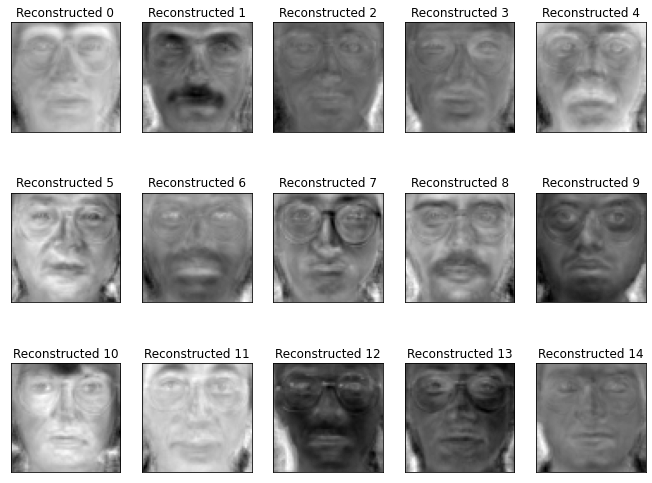

In [20]:
eigenface_titles = ["Reconstructed %d" % i for i in range(X_re.shape[1])]
plot_gallery(X_re, eigenface_titles, 64, 64,3,5)
plt.show()

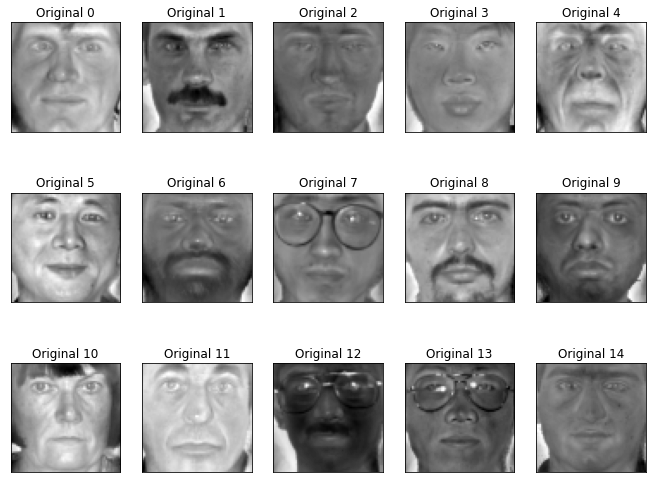

In [21]:
face_titles = ["Original %d" % i for i in range(test_X.shape[1])]
plot_gallery(test_X, face_titles, 64, 64,3,5)
plt.show()

Evaluation parameters to assess compression:
* Nrmse
* r2-score

In [22]:
#Calculating reconstruction error based on different values of k
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for i in range(test_X.shape[0]):
    r2 = r2_score(test_X[i],X_re[i])
    rmse = np.sqrt(mean_squared_error(test_X[i], X_re[i]))

    # RMSE normalised by mean:
    nrmse = rmse/np.sqrt(np.mean(test_X[i]**2))
    
    print(f"\nFor Image {i}:\nr2-score:",r2)
    print("normalized-rmse",nrmse)


For Image 0:
r2-score: 0.8118195035984878
normalized-rmse 0.4038019288440756

For Image 1:
r2-score: 0.8526306862675079
normalized-rmse 0.3137789138838217

For Image 2:
r2-score: 0.8725384561865243
normalized-rmse 0.32648549552114403

For Image 3:
r2-score: 0.7378008890011933
normalized-rmse 0.5039712565486398

For Image 4:
r2-score: 0.7917082644909091
normalized-rmse 0.4327725386939489

For Image 5:
r2-score: 0.714805045109363
normalized-rmse 0.3237524578573219

For Image 6:
r2-score: 0.8226192269061335
normalized-rmse 0.24016754562714052

For Image 7:
r2-score: 0.5406101124439814
normalized-rmse 0.6555730496801412

For Image 8:
r2-score: 0.7122417741534086
normalized-rmse 0.4461177941105973

For Image 9:
r2-score: 0.8319100769710179
normalized-rmse 0.4044259150028464

For Image 10:
r2-score: 0.8585712808779489
normalized-rmse 0.37570517260858916

For Image 11:
r2-score: 0.7432520479961333
normalized-rmse 0.4454117725288015

For Image 12:
r2-score: 0.8394186447264023
normalized-rmse 

## Application: face recognition

In [23]:
train_X, train_y, test_X, test_y = np.load(f'./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

In [24]:
X_train = train_X.T
X_test = test_X.T

In [25]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

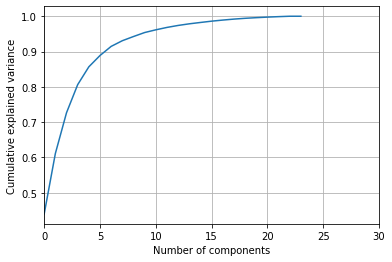

In [26]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

###### SVM Without PCA

In [27]:
# Comparison
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(train_X.T, train_y)
print(clf.best_estimator_)

Fitting the classifier to the training set
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [28]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(test_X.T)
y_pred

Predicting the people names on the testing set


array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [29]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.57      1.00      0.73        12

    accuracy                           0.62        24
   macro avg       0.79      0.62      0.56        24
weighted avg       0.79      0.62      0.56        24



In [30]:
from sklearn import metrics
acc = metrics.accuracy_score(test_y, y_pred)
print(acc)

0.625


In [31]:
print(confusion_matrix(test_y, y_pred))

[[ 3  9]
 [ 0 12]]


**SVM with PCA**

In [32]:
# PCA (with SVD)

vectors,values = my_dual_pca(X_train,False)
sorted_index = values.argsort()[::-1] 
values = values[sorted_index]
vectors = vectors[:,sorted_index]
vectors = vectors[:,:20]
X_train_tran = np.dot(vectors.transpose(), X_train.transpose()).transpose()
X_test_tran = np.dot(vectors.transpose(), X_test.transpose()).transpose()

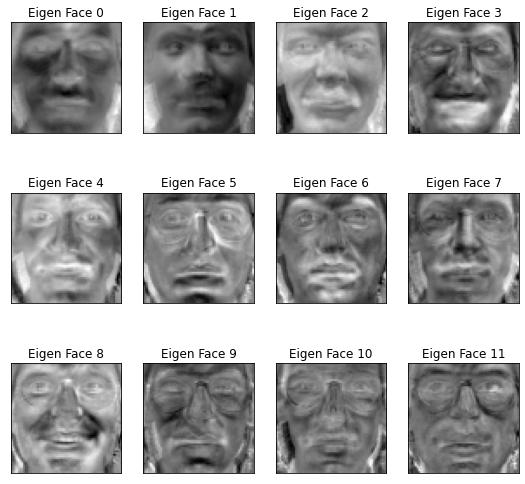

In [33]:
eigenface_titles = ["Eigen Face %d" % i for i in range(vectors.shape[0])]
plot_gallery(vectors.T, eigenface_titles, 64, 64,3,4)
plt.show()

In [34]:
# Comparison
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_tran, train_y)
print("Best estimator found by grid search:")

Fitting the classifier to the training set
Best estimator found by grid search:


In [35]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_tran)
y_pred

Predicting the people names on the testing set


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1], dtype=int64)

In [36]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.80      1.00      0.89        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



In [37]:
from sklearn import metrics
acc = metrics.accuracy_score(test_y, y_pred)
print(acc)

0.875


In [38]:
print(confusion_matrix(test_y, y_pred))

[[ 9  3]
 [ 0 12]]


Accuracy of Classification improves drastically from 62.5 to 87.5 with PCA applied.<br>
This happens because "The curse of dimensionality" is mitigated with the number of features reduced to 20.
<br>This helps the SVM algorithm to classify the images.